In [1]:
# Import modules.
import torch
import random

import numpy as np
import matplotlib.pyplot as plt

from torch import nn
from network import CNN
from trainer import Trainer
from hyperparameters import *
from torchinfo import summary
from optimizer import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
# Set training device.
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available.")
else:
    device = torch.device("cpu")
    print("CUDA is not available, using CPU instead.")

CUDA is available.


In [3]:
# Set random seed.
random_seed = 0

random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [4]:
# Set data transform.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4911, 0.4820, 0.4467),(0.2022, 0.1993, 0.2009)),
])

In [5]:
# Get training dataset.
train_data = datasets.CIFAR100(
    root=DATASET_PATH,
    train=True,
    download=True,
    transform=transform,
)

test_data = datasets.CIFAR100(
    root=DATASET_PATH,
    train=False,
    download=True,
    transform=transform,
)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

In [7]:
model = CNN()
model.to(device=device)

CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (con

In [8]:
# Set optimizer.
optimizer = Optimizer(params=model.parameters(), lr=1e-3)

In [9]:
# Set loss function.
loss_fn = nn.CrossEntropyLoss()

In [10]:
# Show summary of model.
summary(model, input_size=(1, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [1, 100]                  --
├─Sequential: 1-1                        [1, 32, 16, 16]           --
│    └─Conv2d: 2-1                       [1, 32, 32, 32]           896
│    └─BatchNorm2d: 2-2                  [1, 32, 32, 32]           64
│    └─ReLU: 2-3                         [1, 32, 32, 32]           --
│    └─Conv2d: 2-4                       [1, 32, 32, 32]           9,248
│    └─BatchNorm2d: 2-5                  [1, 32, 32, 32]           64
│    └─ReLU: 2-6                         [1, 32, 32, 32]           --
│    └─MaxPool2d: 2-7                    [1, 32, 16, 16]           --
├─Sequential: 1-2                        [1, 64, 8, 8]             --
│    └─Conv2d: 2-8                       [1, 64, 16, 16]           18,496
│    └─BatchNorm2d: 2-9                  [1, 64, 16, 16]           128
│    └─ReLU: 2-10                        [1, 64, 16, 16]           --
│    └

In [11]:
trainer = Trainer(model=model, optimizer=optimizer, loss_fn=loss_fn, train_loader=train_loader, test_loader=test_loader, device=device)

In [12]:
trainer.train(epochs=EPOCHS)

Epoch 0 | Progress: 100.000% | Loss: 4.584 |  Accuracy: 1.728%
Test | Progress: 100.000% | Loss: 4.546 |  Accuracy: 3.418%
Epoch 1 | Progress: 100.000% | Loss: 4.513 |  Accuracy: 5.612%
Test | Progress: 100.000% | Loss: 4.490 |  Accuracy: 7.012%
Epoch 2 | Progress: 100.000% | Loss: 4.464 |  Accuracy: 8.203%
Test | Progress: 100.000% | Loss: 4.449 |  Accuracy: 8.789%
Epoch 3 | Progress: 100.000% | Loss: 4.426 |  Accuracy: 9.965%
Test | Progress: 100.000% | Loss: 4.418 |  Accuracy: 9.912%
Epoch 4 | Progress: 100.000% | Loss: 4.396 |  Accuracy: 11.344%
Test | Progress: 100.000% | Loss: 4.391 |  Accuracy: 10.967%
Epoch 5 | Progress: 100.000% | Loss: 4.370 |  Accuracy: 12.357%
Test | Progress: 100.000% | Loss: 4.369 |  Accuracy: 11.797%
Epoch 6 | Progress: 100.000% | Loss: 4.349 |  Accuracy: 13.383%
Test | Progress: 100.000% | Loss: 4.349 |  Accuracy: 12.422%
Epoch 7 | Progress: 100.000% | Loss: 4.329 |  Accuracy: 14.045%
Test | Progress: 100.000% | Loss: 4.332 |  Accuracy: 12.939%
Epoch 8 

In [13]:
# Get train history.
loss_history, acc_history = trainer.get_train_history()

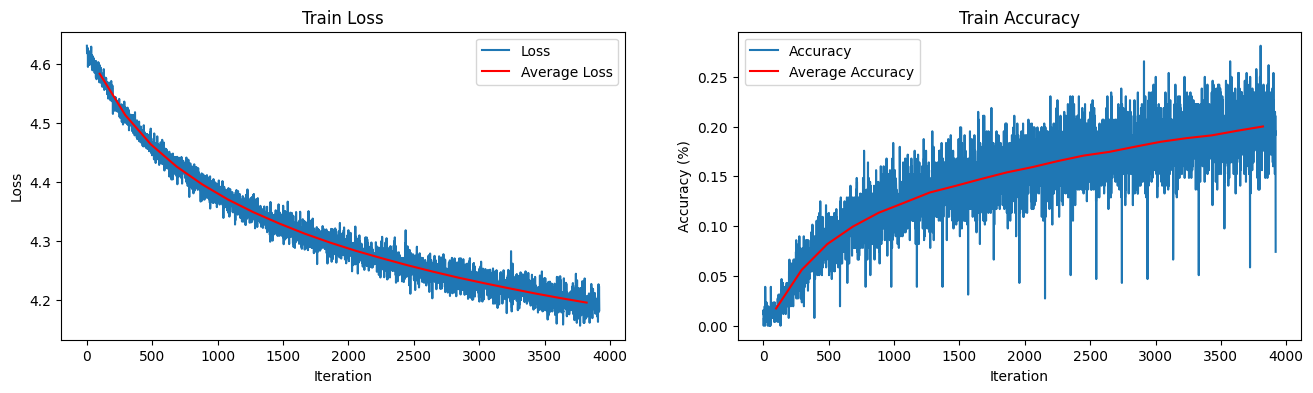

In [14]:
iter_num = 196
temp_x = [iter_num * i for i in range(EPOCHS+1)]

fig = plt.figure(figsize=(16, 4))

# Plot loss history.
ax = fig.add_subplot(1, 2, 1)

plt.title("Train Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")

# Plot loss.
ax.plot(loss_history, label="Loss")

# Calculate and plot average loss.
avg_loss_x = [(temp_x[i] + temp_x[i+1]) // 2 for i in range(EPOCHS)]
avg_loss_y = [sum(loss_history[temp_x[i]:temp_x[i+1]]) / iter_num for i in range(EPOCHS)]
ax.plot(avg_loss_x, avg_loss_y, 'r', label="Average Loss")
ax.legend()


# Plot accuracy history.
ax = fig.add_subplot(1, 2, 2)

plt.title("Train Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")

# Plot accuracy.
ax.plot(acc_history, label="Accuracy")

# Calculate and plot average accuracy.
avg_acc_x = [(temp_x[i] + temp_x[i+1]) // 2 for i in range(EPOCHS)]
avg_acc_y = [sum(acc_history[temp_x[i]:temp_x[i+1]]) / iter_num for i in range(EPOCHS)]
ax.plot(avg_acc_x, avg_acc_y, 'r', label="Average Accuracy")
ax.legend()

# Show figure.
plt.show()

In [15]:
# Save loss and accuracy history.
loss_f = open("../results/loss_history.txt", "w")
acc_f = open("../results/acc_history.txt", "w")

loss_buffer = ""
acc_buffer = ""

for i in loss_history: loss_buffer += f"{str(i)},"
for i in acc_history: acc_buffer += f"{str(i)},"

loss_f.write(loss_buffer)
acc_f.write(acc_buffer)

loss_f.close()
acc_f.close()